Sales Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# validitas data (duplicate, na), distribusi data (pastikan data valid)
# mau apa terhadap data, mau analisa bagian yang mana (relevansi datanya)
# keinginan bisa ditrigger dari permintaan atau datanya apa

# Biasanya antara preventif loss (biar ga rugi)/generative profit (potential biasanya prediktif)
# biasanya handle loss

# key metrics : total sales, profit, average discount, most common ship mode
# bawahnya baru sub category

In [ ]:
df = pd.read_csv('train.csv')

In [14]:
# 1. Key Metrics Summary
key_metrics = {
    'Total Sales': df['Sales'].sum(),
    'Average Order Value': df['Sales'].mean(),
    'Total Orders': df['Order ID'].nunique(),
    'Total Customers': df['Customer ID'].nunique()
}

for metric, value in key_metrics.items():
    print(f"{metric}: ${value:,.2f}")

# 2. Profitability Analysis by Category
profitability = df.groupby('Category').agg({
    'Sales': ['sum', 'mean', 'count']
}).round(2)

print("\nCategory Performance:")
print(profitability)

# 3. Ship Mode Analysis
shipmode_analysis = df.groupby('Ship Mode').agg({
    'Sales': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Number of Orders'})

print("\nShipping Analysis:")
print(shipmode_analysis.sort_values('Sales', ascending=False))

# 4. Customer Segment Analysis
segment_analysis = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Number of Customers'})

print("\nCustomer Segment Analysis:")
print(segment_analysis.sort_values('Sales', ascending=False))


Total Sales: $2,261,536.78
Average Order Value: $230.77
Total Orders: $4,922.00
Total Customers: $793.00

Category Performance:
                     Sales              
                       sum    mean count
Category                                
Furniture        728658.58  350.65  2078
Office Supplies  705422.33  119.38  5909
Technology       827455.87  456.40  1813

Shipping Analysis:
                       Sales  Number of Orders
Ship Mode                                     
Standard Class  1.340831e+06              5859
Second Class    4.499142e+05              1902
First Class     3.455723e+05              1501
Same Day        1.252190e+05               538

Customer Segment Analysis:
                    Sales  Number of Customers
Segment                                       
Consumer     1.148061e+06                  409
Corporate    6.884941e+05                  236
Home Office  4.249822e+05                  148


In [ ]:
#tinggal key metrics + grafik
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [11]:
df.describe

<bound method NDFrame.describe of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520    

In [13]:
df.isnull().sum()
#buang aja karena tidak signifikan 

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
df = df.dropna()
print(df.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


## Analisis Deskriptif

Category
Technology         825856.1130
Furniture          723538.4757
Office Supplies    703212.8240
Name: Sales, dtype: float64


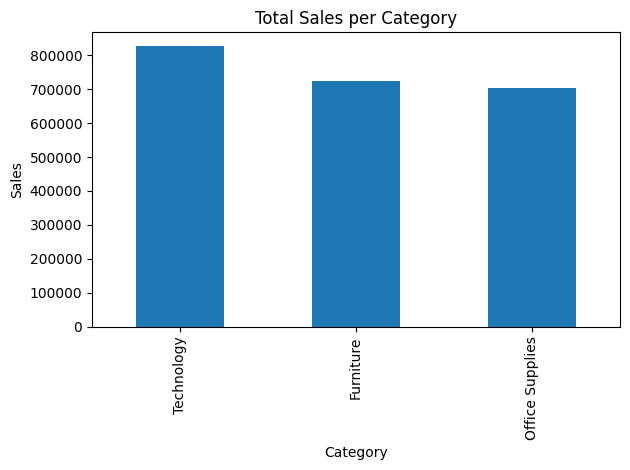

In [55]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
print(category_sales)
category_sales.plot(kind="bar", title="Total Sales per Category", ylabel="Sales", xlabel="Category")
plt.tight_layout()
plt.show()

Segment
Consumer       1.146708e+06
Corporate      6.822118e+05
Home Office    4.236874e+05
Name: Sales, dtype: float64


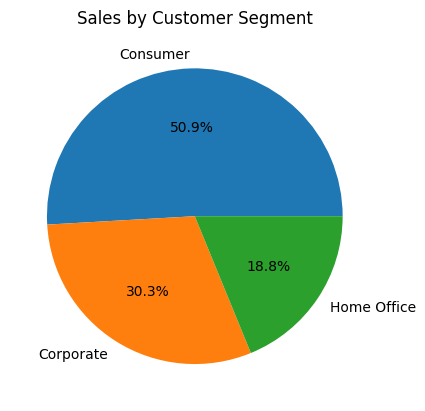

In [42]:
segment_sales = df.groupby("Segment")["Sales"].sum()
print(segment_sales)
segment_sales.plot(kind="pie", autopct='%1.1f%%', title="Sales by Customer Segment")
plt.ylabel("")
plt.show()

               Sales
Region              
South    389151.4590
Central  492646.9132
East     660589.3560
West     710219.6845


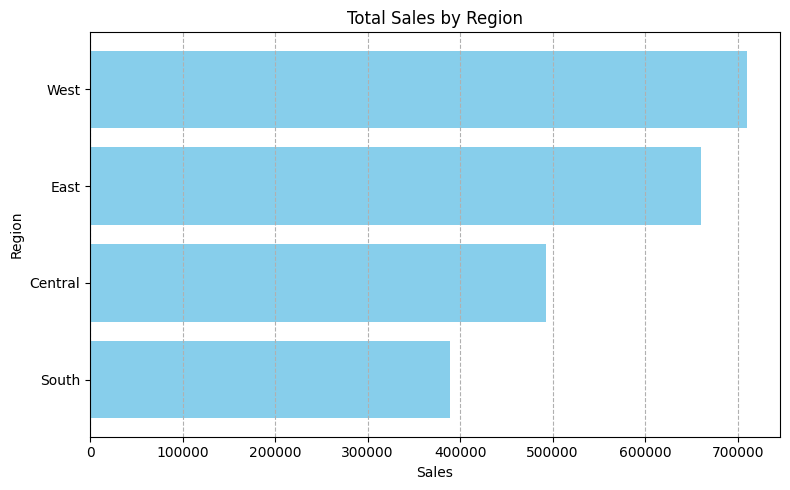

In [78]:
region_sales = df.groupby("Region")[['Sales']].sum().sort_values('Sales')
print(region_sales)

plt.figure(figsize=(8, 5))
plt.barh(region_sales.index, region_sales['Sales'], color='skyblue')
plt.title("Total Sales by Region")
plt.xlabel("Sales")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

## Time Series 

C:\Users\71487\AppData\Local\Temp\ipykernel_12980\2991163772.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Order Date').resample("M")['Sales'].sum()


Order Date
2015-01-31    14205.707
2015-02-28     4519.892
2015-03-31    55205.797
2015-04-30    27906.855
2015-05-31    23644.303
Freq: ME, Name: Sales, dtype: float64


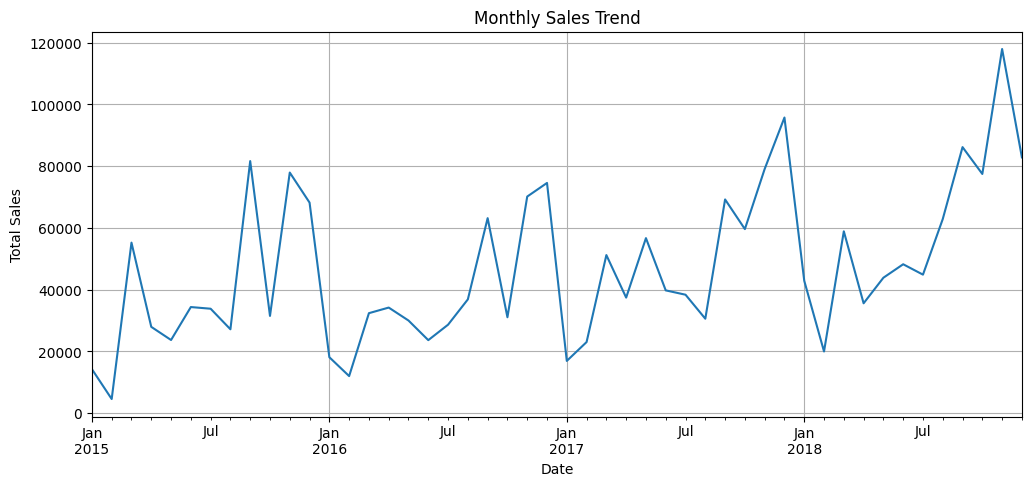

In [48]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
# print(df['Order Date'])

monthly_sales = df.set_index('Order Date').resample("M")['Sales'].sum()
print(monthly_sales.head())

plt.figure(figsize=(12, 5))
monthly_sales.plot(title="Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.grid(True)
plt.show()

Ship Mode
Same Day          0.044610
First Class       2.179214
Second Class      3.249868
Standard Class    5.009916
Name: Shipping Time, dtype: float64


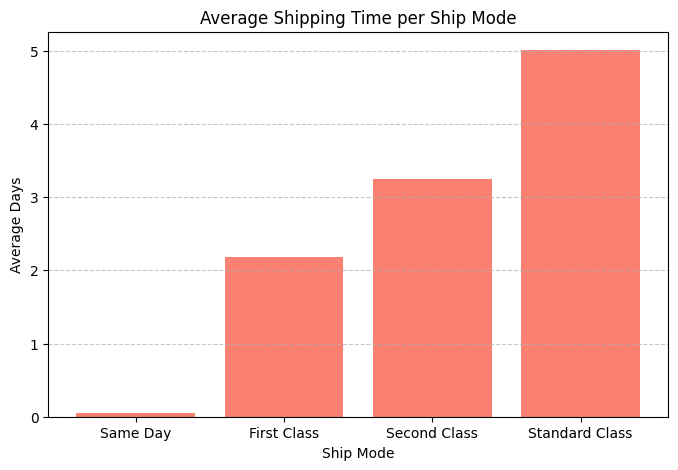

In [ ]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Shipping Time'] = (df['Ship Date']-df['Order Date']).dt.days

shipmode_time = df.groupby('Ship Mode')['Shipping Time'].mean().sort_values()
print(shipmode_time)
plt.figure(figsize=(8, 5))
plt.bar(shipmode_time.index, shipmode_time.values, color='salmon')
plt.title("Average Shipping Time per Ship Mode")
plt.ylabel("Average Days")
plt.xlabel("Ship Mode")
plt.grid(axis='y', linestyle='--', alpha=0.7)


Sub-Category
Phones         326487.6980
Chairs         322107.5310
Storage        217779.1020
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    163881.6900
Copiers        146248.0940
Bookcases      109408.2987
Appliances     104075.4630
Furnishings     89212.0180
Paper           76736.1040
Supplies        46420.3080
Art             26697.3700
Envelopes       16126.0060
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64


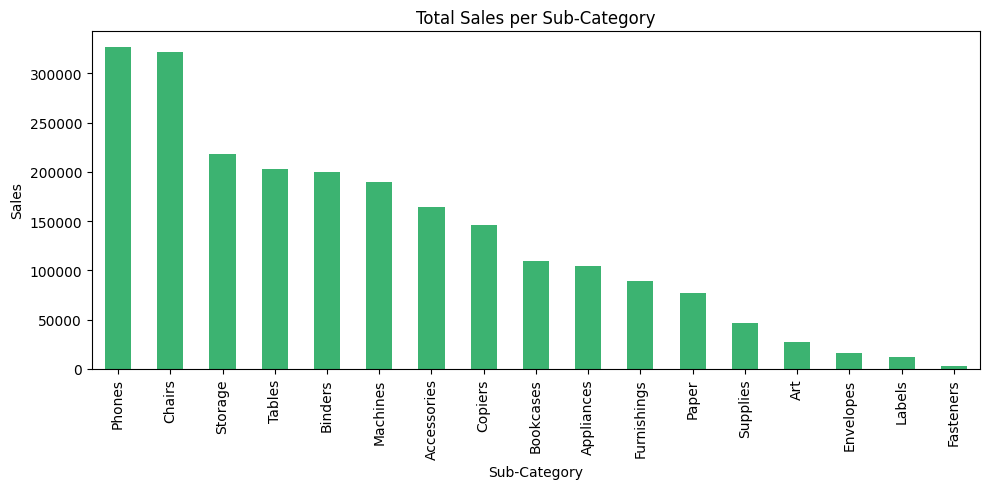

In [79]:
subcat_sales = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)
print(subcat_sales)

plt.figure(figsize=(10,5))
subcat_sales.plot(kind="bar", color="mediumseagreen")
plt.title("Total Sales per Sub-Category")
plt.ylabel("Sales")
plt.xlabel("Sub-Category")
plt.tight_layout()
plt.show()

In [18]:

df1 = pd.DataFrame({'Produk': ['Apel', 'Jeruk', 'Pisang'], 'Penjualan': [300, 200, 150]})
df2 = pd.DataFrame({'Produk': ['Apel', 'Jeruk', 'Mangga'], 'Harga': [5000, 1500, 2000]})

# Menggabungkan DataFrame dengan Inner Join
result_inner = pd.merge(df1, df2, on='Produk', how='right')
print(result_inner)


   Produk  Penjualan  Harga
0    Apel      300.0   5000
1   Jeruk      200.0   1500
2  Mangga        NaN   2000


In [19]:
%pip install git-clone

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
git --version

NameError: name 'git' is not defined